In [49]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from Column import *
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

### 📍 Reading [**Dataset**](https://www.kaggle.com/datasets/uciml/news-aggregator-dataset/data)

> * b : **business**
> * t : **science and technology** 
> * e : **entertainment** 
> * m : **health**

In [2]:
df = pd.read_csv("Dataset/AGNews.csv")
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
df = pd.concat([df["TITLE"],df["CATEGORY"]],axis=1)
df

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m
422415,Boy to have surgery on esophagus after battery...,m
422416,Child who swallowed battery to have reconstruc...,m
422417,Phoenix boy undergoes surgery to repair throat...,m


In [4]:
df.shape

(422419, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   TITLE     422419 non-null  object
 1   CATEGORY  422419 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [6]:
df.describe(include="object")

,TITLE,CATEGORY
count,422419,422419
unique,406455,4
top,The article requested cannot be found! Please ...,e
freq,145,152469


In [7]:
df.isnull().sum()

TITLE       0
CATEGORY    0
dtype: int64

In [8]:
df.duplicated(subset="TITLE").sum()

np.int64(15964)

In [9]:
df.drop_duplicates(subset="TITLE")

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m
422415,Boy to have surgery on esophagus after battery...,m
422416,Child who swallowed battery to have reconstruc...,m
422417,Phoenix boy undergoes surgery to repair throat...,m


In [10]:
df["CATEGORY"].value_counts()

CATEGORY
e    152469
b    115967
t    108344
m     45639
Name: count, dtype: int64

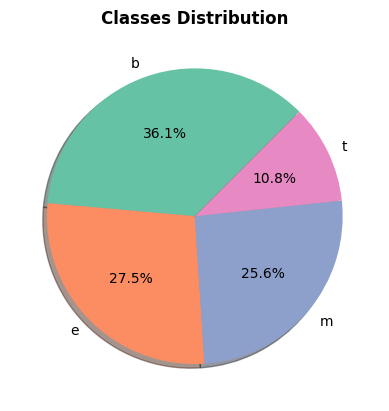

In [11]:
counts = df["CATEGORY"].value_counts().to_numpy()

colors = sns.color_palette('Set2', len(df))
plt.title("Classes Distribution",weight="bold")
plt.pie(x=counts,labels=np.unique(df["CATEGORY"].to_numpy()),colors=colors,rotatelabels=False,autopct="%1.1f%%",startangle=45,shadow=True)
plt.show()

### 🛠 Text Preprocessing 

> - **Column Class:** is used for update **`CleanedText Column`** without repeating Block of Code

In [12]:
df["CleanedText"] = df["TITLE"].apply(lambda e: e.lower())

In [13]:
text = column(Dataset=df,Column_name="CleanedText")

In [14]:
text.Update(func=lambda e: e.lower())
df

,TITLE,CATEGORY,CleanedText
0,"Fed official says weak data caused by weather,...",b,"fed official says weak data caused by weather,..."
1,Fed's Charles Plosser sees high bar for change...,b,fed's charles plosser sees high bar for change...
2,US open: Stocks fall after Fed official hints ...,b,us open: stocks fall after fed official hints ...
3,"Fed risks falling 'behind the curve', Charles ...",b,"fed risks falling 'behind the curve', charles ..."
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,fed's plosser: nasty weather has curbed job gr...
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,surgeons to remove 4-year-old's rib to rebuild...
422415,Boy to have surgery on esophagus after battery...,m,boy to have surgery on esophagus after battery...
422416,Child who swallowed battery to have reconstruc...,m,child who swallowed battery to have reconstruc...
422417,Phoenix boy undergoes surgery to repair throat...,m,phoenix boy undergoes surgery to repair throat...


### 📍 Removing Any Single Letter

In [15]:
text.Update(func=lambda e:re.sub(pattern=r"\b[a-zA-Z]{1}\b",repl=" ",string=e))
df

,TITLE,CATEGORY,CleanedText
0,"Fed official says weak data caused by weather,...",b,"fed official says weak data caused by weather,..."
1,Fed's Charles Plosser sees high bar for change...,b,fed' charles plosser sees high bar for change...
2,US open: Stocks fall after Fed official hints ...,b,us open: stocks fall after fed official hints ...
3,"Fed risks falling 'behind the curve', Charles ...",b,"fed risks falling 'behind the curve', charles ..."
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,fed' plosser: nasty weather has curbed job gr...
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,surgeons to remove 4-year-old' rib to rebuild...
422415,Boy to have surgery on esophagus after battery...,m,boy to have surgery on esophagus after battery...
422416,Child who swallowed battery to have reconstruc...,m,child who swallowed battery to have reconstruc...
422417,Phoenix boy undergoes surgery to repair throat...,m,phoenix boy undergoes surgery to repair throat...


### 📍 Tokenizing 

In [17]:
text.Update(func=lambda e:word_tokenize(text=e))
df

,TITLE,CATEGORY,CleanedText
0,"Fed official says weak data caused by weather,...",b,"[fed, official, says, weak, data, caused, by, ..."
1,Fed's Charles Plosser sees high bar for change...,b,"[fed, ', charles, plosser, sees, high, bar, fo..."
2,US open: Stocks fall after Fed official hints ...,b,"[us, open, :, stocks, fall, after, fed, offici..."
3,"Fed risks falling 'behind the curve', Charles ...",b,"[fed, risks, falling, 'behind, the, curve, ', ..."
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,"[fed, ', plosser, :, nasty, weather, has, curb..."
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,"[surgeons, to, remove, 4-year-old, ', rib, to,..."
422415,Boy to have surgery on esophagus after battery...,m,"[boy, to, have, surgery, on, esophagus, after,..."
422416,Child who swallowed battery to have reconstruc...,m,"[child, who, swallowed, battery, to, have, rec..."
422417,Phoenix boy undergoes surgery to repair throat...,m,"[phoenix, boy, undergoes, surgery, to, repair,..."


### 📍 Removing **Stop Words**

In [18]:
en_stopwords = stopwords.words("english")

def Remove_stopwords(words:list[str]):
    return [word for word in words if word not in en_stopwords]

In [19]:
text.Update(func=lambda x:Remove_stopwords(x))
df

,TITLE,CATEGORY,CleanedText
0,"Fed official says weak data caused by weather,...",b,"[fed, official, says, weak, data, caused, weat..."
1,Fed's Charles Plosser sees high bar for change...,b,"[fed, ', charles, plosser, sees, high, bar, ch..."
2,US open: Stocks fall after Fed official hints ...,b,"[us, open, :, stocks, fall, fed, official, hin..."
3,"Fed risks falling 'behind the curve', Charles ...",b,"[fed, risks, falling, 'behind, curve, ', ,, ch..."
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,"[fed, ', plosser, :, nasty, weather, curbed, j..."
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,"[surgeons, remove, 4-year-old, ', rib, rebuild..."
422415,Boy to have surgery on esophagus after battery...,m,"[boy, surgery, esophagus, battery, burns, hole..."
422416,Child who swallowed battery to have reconstruc...,m,"[child, swallowed, battery, reconstructive, su..."
422417,Phoenix boy undergoes surgery to repair throat...,m,"[phoenix, boy, undergoes, surgery, repair, thr..."


### 📍 Lemmatization Words

In [20]:
lemma = WordNetLemmatizer()

def lemmatize(Words:list[str]):
    return [lemma.lemmatize(word=word,pos="v") for word in Words]

In [21]:
text.Update(func=lambda e:lemmatize(e))
df

,TITLE,CATEGORY,CleanedText
0,"Fed official says weak data caused by weather,...",b,"[feed, official, say, weak, data, cause, weath..."
1,Fed's Charles Plosser sees high bar for change...,b,"[feed, ', charles, plosser, see, high, bar, ch..."
2,US open: Stocks fall after Fed official hints ...,b,"[us, open, :, stock, fall, feed, official, hin..."
3,"Fed risks falling 'behind the curve', Charles ...",b,"[feed, risk, fall, 'behind, curve, ', ,, charl..."
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,"[feed, ', plosser, :, nasty, weather, curb, jo..."
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,"[surgeons, remove, 4-year-old, ', rib, rebuild..."
422415,Boy to have surgery on esophagus after battery...,m,"[boy, surgery, esophagus, battery, burn, hole,..."
422416,Child who swallowed battery to have reconstruc...,m,"[child, swallow, battery, reconstructive, surg..."
422417,Phoenix boy undergoes surgery to repair throat...,m,"[phoenix, boy, undergo, surgery, repair, throa..."


### 📍 Trans List to String 

In [22]:
def to_String(Words:list[str]):
    return " ".join(Words)

In [23]:
text.Update(func=lambda x:to_String(x))
df

,TITLE,CATEGORY,CleanedText
0,"Fed official says weak data caused by weather,...",b,"feed official say weak data cause weather , sl..."
1,Fed's Charles Plosser sees high bar for change...,b,feed ' charles plosser see high bar change pac...
2,US open: Stocks fall after Fed official hints ...,b,us open : stock fall feed official hint accele...
3,"Fed risks falling 'behind the curve', Charles ...",b,"feed risk fall 'behind curve ' , charles ploss..."
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,feed ' plosser : nasty weather curb job growth
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,surgeons remove 4-year-old ' rib rebuild damag...
422415,Boy to have surgery on esophagus after battery...,m,boy surgery esophagus battery burn hole throat
422416,Child who swallowed battery to have reconstruc...,m,child swallow battery reconstructive surgery c...
422417,Phoenix boy undergoes surgery to repair throat...,m,phoenix boy undergo surgery repair throat dama...


### 📍 Removing any Punctuation

In [24]:
text.Update(func=lambda e:re.sub(pattern=r"[^a-zA-Z]",repl=" ",string=e))
df

,TITLE,CATEGORY,CleanedText
0,"Fed official says weak data caused by weather,...",b,feed official say weak data cause weather sl...
1,Fed's Charles Plosser sees high bar for change...,b,feed charles plosser see high bar change pac...
2,US open: Stocks fall after Fed official hints ...,b,us open stock fall feed official hint accele...
3,"Fed risks falling 'behind the curve', Charles ...",b,feed risk fall behind curve charles ploss...
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,feed plosser nasty weather curb job growth
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,surgeons remove year old rib rebuild damag...
422415,Boy to have surgery on esophagus after battery...,m,boy surgery esophagus battery burn hole throat
422416,Child who swallowed battery to have reconstruc...,m,child swallow battery reconstructive surgery c...
422417,Phoenix boy undergoes surgery to repair throat...,m,phoenix boy undergo surgery repair throat dama...


## 🟢 From Here We Build Model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [26]:
x = df["TITLE"]
y = df["CATEGORY"]

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

### 🟢 Convert text to numerical format using **TF-IDF**

In [28]:
tfidf = TfidfVectorizer(max_features=65000)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf  = tfidf.transform(x_test)

In [29]:
print(f"🟢 Number of Features = {len(tfidf.get_feature_names_out())} Feature")

🟢 Number of Features = 50140 Feature


## ✅ Logistic Regression Model

In [30]:
lr = LogisticRegression(random_state=42,max_iter=1000,C=10,solver="saga")

lr.fit(x_train_tfidf,y_train)
y_predicted = lr.predict(x_test_tfidf)

In [31]:
lr_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)

print(f"The Accurecy of Logestic Regression = {lr_acc*100:0.2f} %")

The Accurecy of Logestic Regression = 94.83 %


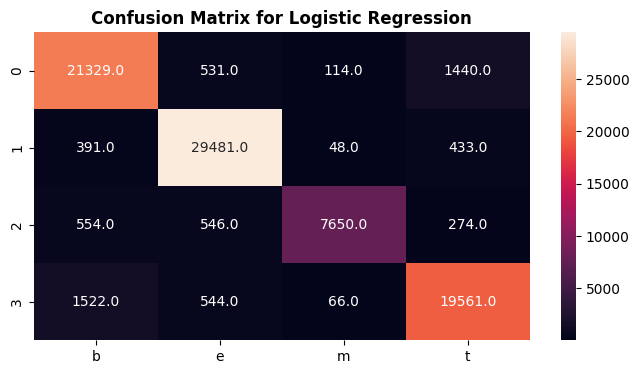

In [51]:
con = confusion_matrix(y_true=y_test,y_pred=y_predicted)

plt.figure(figsize=(8,4))
plt.title("Confusion Matrix for Logistic Regression",weight="bold")
sns.heatmap(data=con,annot=True,fmt="0.1f",xticklabels=np.unique(y))
plt.show()

In [33]:
print(classification_report(y_true=y_test,y_pred=y_predicted))

              precision    recall  f1-score   support

           b       0.93      0.93      0.93     23414
           e       0.97      0.98      0.98     30353
           m       0.96      0.94      0.95      9024
           t       0.93      0.93      0.93     21693

    accuracy                           0.95     84484
   macro avg       0.95      0.94      0.95     84484
weighted avg       0.95      0.95      0.95     84484



## 🟢 Naive Bayes Model

In [34]:
naive = MultinomialNB()

naive.fit(x_train_tfidf,y_train)
y_predicted = naive.predict(x_test_tfidf)

In [35]:
naive_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)

print(f"The Accurecy of Weighted Logestic Regression = {naive_acc*100:0.2f} %")

The Accurecy of Weighted Logestic Regression = 92.35 %


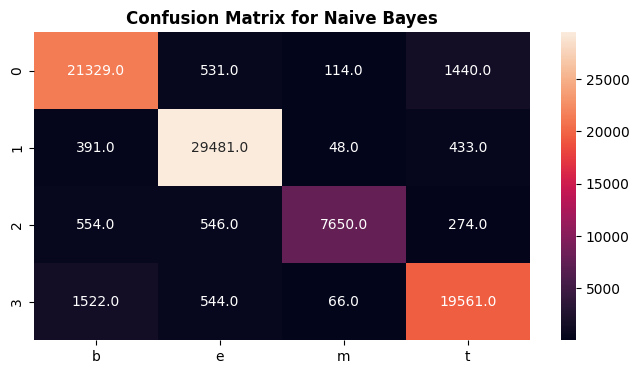

In [36]:
con = confusion_matrix(y_true=y_test,y_pred=y_predicted)

plt.figure(figsize=(8,4))
plt.title("Confusion Matrix for Naive Bayes",weight="bold")
sns.heatmap(data=con,annot=True,fmt="0.1f",xticklabels=np.unique(y))
plt.show()

In [37]:
print(classification_report(y_true=y_test,y_pred=y_predicted))

              precision    recall  f1-score   support

           b       0.90      0.91      0.90     23414
           e       0.95      0.97      0.96     30353
           m       0.97      0.85      0.91      9024
           t       0.90      0.90      0.90     21693

    accuracy                           0.92     84484
   macro avg       0.93      0.91      0.92     84484
weighted avg       0.92      0.92      0.92     84484



### 💹 Comparison between Models

In [52]:
all_results = {"Logistic Regression":lr_acc,"Naive Bayes":naive_acc}

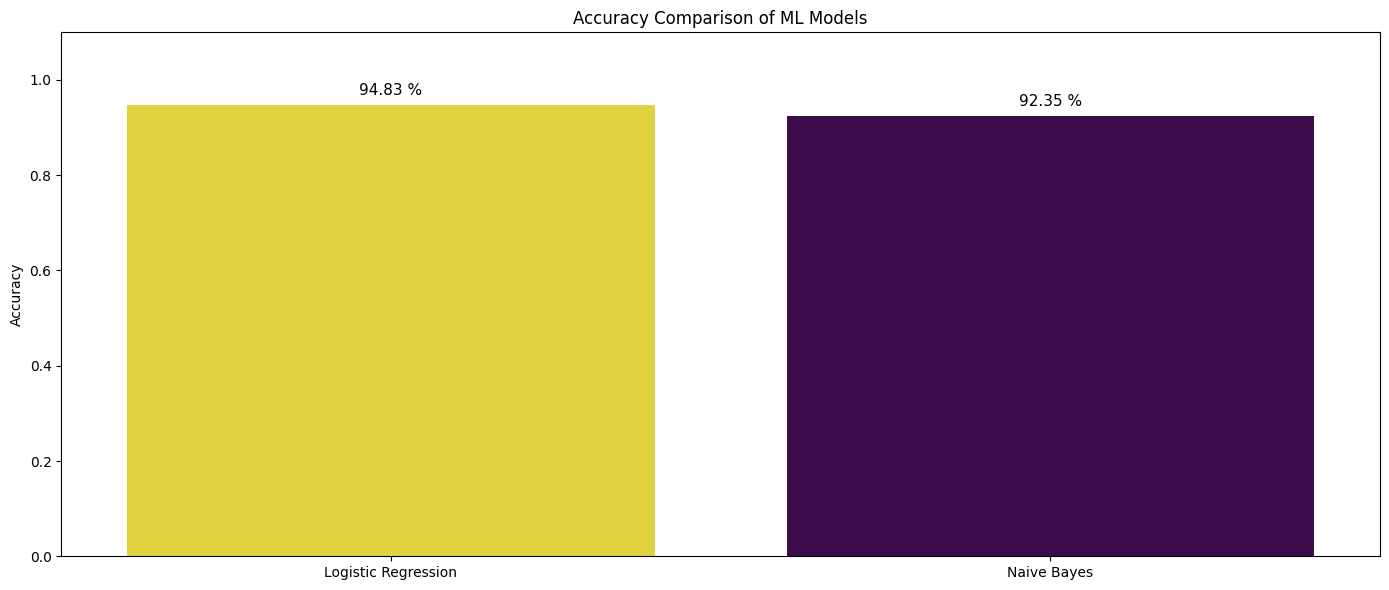

In [53]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=list(all_results.keys()),y=list(all_results.values()),palette="viridis",hue=list(all_results.values()),legend=False)
plt.title("Accuracy Comparison of ML Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height*100:.2f} %",(p.get_x() + p.get_width() / 2, height),ha="center",va="bottom",fontsize=11,xytext=(0, 5),textcoords="offset points")

plt.tight_layout()
plt.grid(False)
plt.show()

### 🟢 Visualize the most frequent Words in Dataset Classes

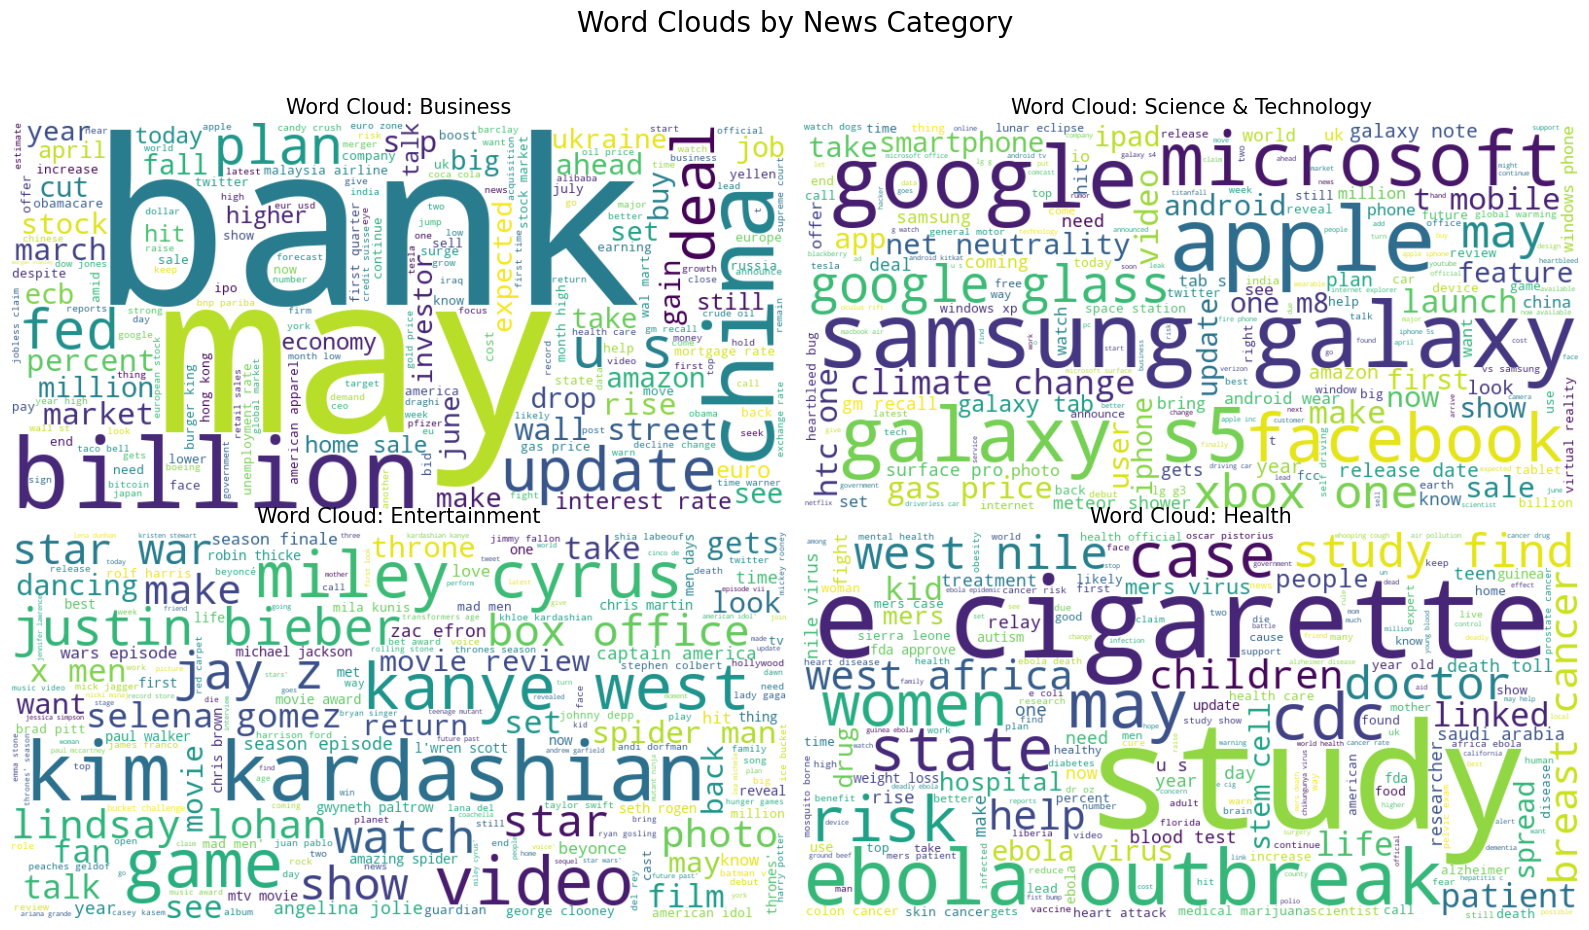

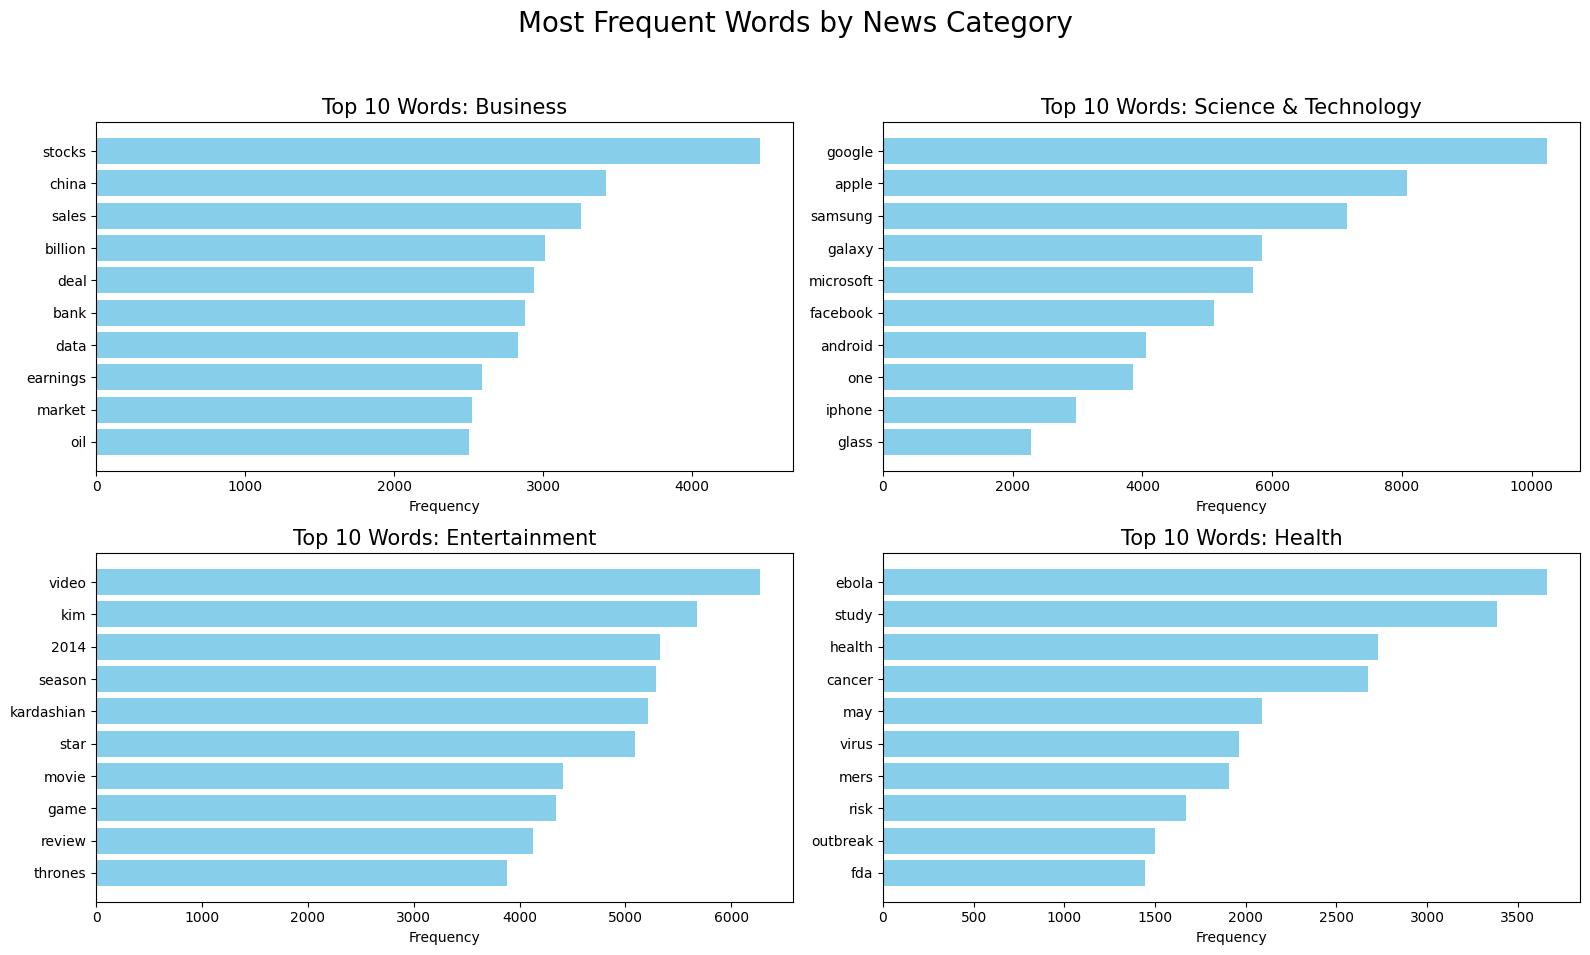

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

df = pd.read_csv('Dataset/AGNews.csv')


category_names = {'b': 'Business','t': 'Science & Technology','e': 'Entertainment','m': 'Health'}

fig_wc, axes_wc = plt.subplots(2, 2, figsize=(16, 10))
axes_wc = axes_wc.flatten()

fig_bar, axes_bar = plt.subplots(2, 2, figsize=(16, 10))
axes_bar = axes_bar.flatten()

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['new', 'report', 'says', 'us', 'say', 'said', 'will'])

categories = ['b', 't', 'e', 'm']

for i, cat in enumerate(categories):
    cat_df = df[df['CATEGORY'] == cat]
    
    if not cat_df.empty:
        text = " ".join(cat_df['TITLE'].values).lower()
    else:
        text = "no data"

    wc = WordCloud(background_color='white',stopwords=custom_stopwords,width=800,height=400).generate(text)
    
    axes_wc[i].imshow(wc, interpolation='bilinear')
    axes_wc[i].set_title(f"Word Cloud: {category_names.get(cat, cat)}", fontsize=15)
    axes_wc[i].axis('off')

    translator = str.maketrans('', '', string.punctuation)
    clean_text = text.translate(translator)
    words = [w for w in clean_text.split() if w not in custom_stopwords and len(w) > 2]
    
    word_counts = Counter(words).most_common(10)
    
    if word_counts:
        words_, counts_ = zip(*word_counts)
        axes_bar[i].barh(words_[::-1], counts_[::-1], color='skyblue')
        axes_bar[i].set_title(f"Top 10 Words: {category_names.get(cat, cat)}", fontsize=15)
        axes_bar[i].set_xlabel("Frequency")
    else:
        axes_bar[i].text(0.5, 0.5, 'Not enough data', ha='center')

fig_wc.suptitle('Word Clouds by News Category', fontsize=20)
fig_wc.tight_layout(rect=[0, 0.03, 1, 0.95])

fig_bar.suptitle('Most Frequent Words by News Category', fontsize=20)
fig_bar.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

---

<h1 align="center">✅ The End of NoteBook</h1>


---